# EMEPy Bragg Grating

This example is currently in progress. See the benchmarks directory for a detailed guide on bragg gratings in EMEPy. In the future, this notebook will demonstrate how to simulate and visualize field profiles as they propagate through the device. 

Start by importing the necessary modules and defining the device parameters.

In [1]:
from emepy import Layer, EME, Source
from emepy.ann import ANN, MSNeuralNetwork
import numpy as np
from matplotlib import pyplot as plt

num_periods = 15  # Number of Periods for Bragg Grating
length = .159e-6 # Length of each segment of BG, Period = Length * 2
wavelength = 1.55e-6 # Wavelength
num_modes = 1  # Number of Modes
mesh = 200 # Number of mesh points
width1 = 0.46e-6 # Width of first core block
width2 = 0.54e-6 # Width of second core block 
thickness = 0.22e-6 # Thicnkess of the core
modesolver = MSNeuralNetwork # Which modesolver to use

### Define the simulation

In [2]:
eme = EME(num_periods=num_periods,quiet=True)
ann = ANN()

/Users/ianhammond/miniconda3/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


### Create the device

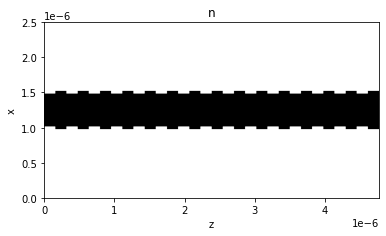

In [3]:
mode_solver1 = modesolver(
    ann,
    wavelength,
    width1,
    thickness,
)  # First half of bragg grating

mode_solver2 = modesolver(
    ann,
    wavelength,
    width2,
    thickness,
)  # Second half of bragg grating

eme.add_layer(Layer(mode_solver1, num_modes, wavelength, length))  # First half of bragg grating
eme.add_layer(Layer(mode_solver2, num_modes, wavelength, length))  # Second half of bragg grating

plt.figure()
eme.draw()
plt.show()

### Create a monitor

In [4]:
positive_source = Source(1.2e-6,[1],-1)
negative_source = Source(3.2e-6,[1],1)
monitor = eme.add_monitor(axes="xz",mesh_z=200,sources=[positive_source, negative_source])

### Run the simulation

In [5]:
eme.propagate(left_coeffs=[],right_coeffs=[])  # propagate at given wavelength

### Visualize monitor

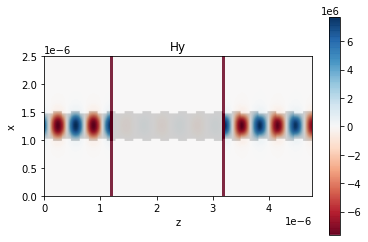

In [6]:
plt.figure()
monitor.visualize(component="Hy")
plt.colorbar()
plt.show()